In [1]:
%load_ext autoreload
%autoreload 2

# Training


In [55]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

from src.data_cleaning.controller import load_train_test_split

(
    X_train,
    y_train,
    w_train,
    X_test,
    y_test,
    w_test,
) = load_train_test_split(drop_na=False)


clf = xgb.XGBClassifier().fit(X_train, y_train, sample_weight=w_train)

print(f"train accuracy {accuracy_score(y_train, clf.predict(X_train))*100:.2f} %")
test_accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f"test accuracy {test_accuracy*100:.2f} %")


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


train accuracy 76.54 %
test accuracy 69.42 %


In [56]:
# save model

import os

os.makedirs("src/models", exist_ok=True)
clf.save_model(f"src/models/xgb_model_{test_accuracy:.4f}.json")

# Load model


In [16]:
import xgboost as xgb

best_model = "src/models/xgb_model_0.8232.json"

clf = xgb.Booster()
clf.load_model(best_model)

# Global explainability

You need to have a model in the memory before running those cells


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

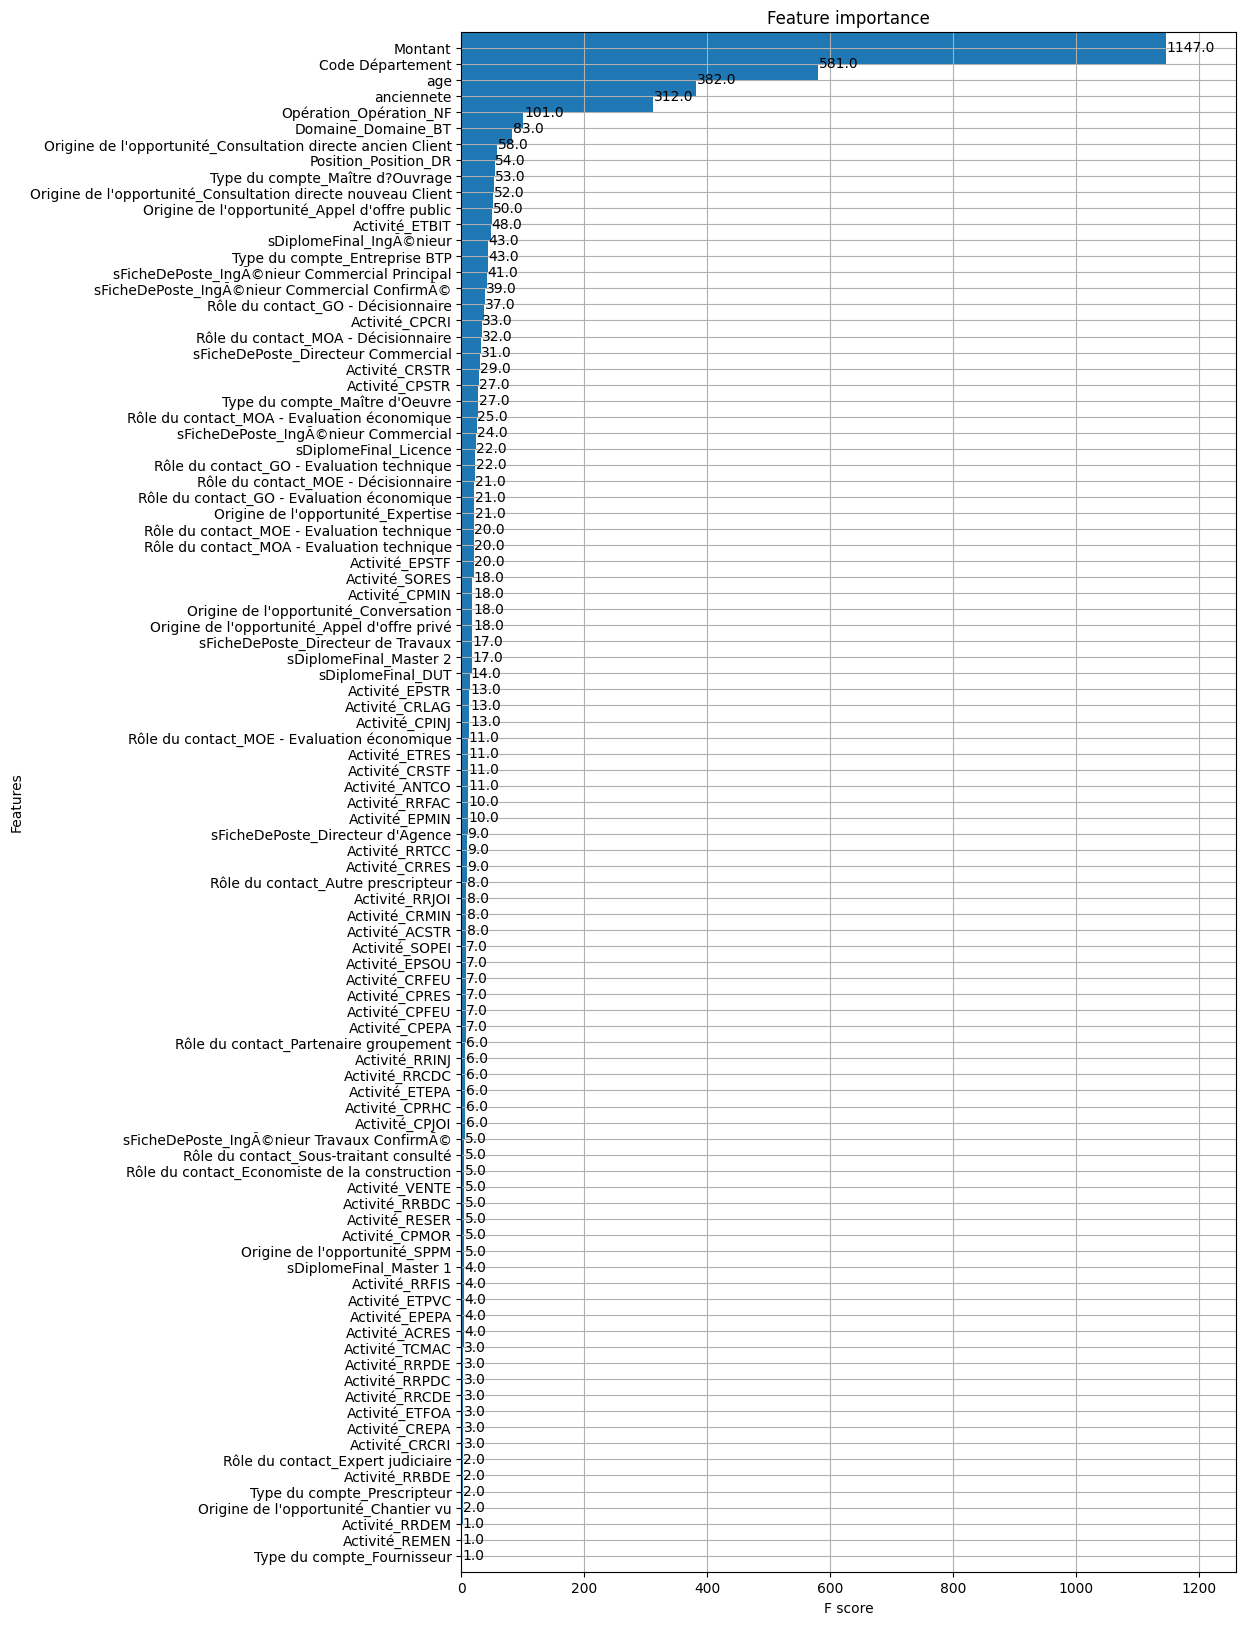

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))

xgb.plot_importance(clf, ax=ax, height=2)

In [21]:
import shap
from src.data_cleaning.controller import load_train_test_split

shap.initjs()
X_train, y_train, X_test, y_test = load_train_test_split(drop_na=False)

explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


XGBoostError: [15:38:10] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\tree\tree_model.cc:869: Check failed: !HasCategoricalSplit(): Please use JSON/UBJSON for saving models with categorical splits.

# Local explainability

You need to have a model in the memory before running those cells


In [8]:
import shap
import numpy as np

from src.data_cleaning.controller import load_train_test_split

shap.initjs()

X_train, y_train, X_test, y_test = load_train_test_split(drop_na=False)

explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_test)

INDEX = 0  # change this to choose the data point you want to explain

print(f"prediction: {clf.predict_proba(np.array(X_test.iloc[INDEX]).reshape(1, -1))}")

shap.force_plot(
    explainer.expected_value,
    shap_values[INDEX],
    features=X_test.iloc[INDEX],
    feature_names=X_test.columns,
)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


prediction: [[0.3561409 0.6438591]]


In [ ]:
import numpy as np

from anchor import anchor_tabular
from src.data_cleaning.controller import load_train_test_split

X_train, y_train, X_test, y_test = load_train_test_split(drop_na=False)

explainer = anchor_tabular.AnchorTabularExplainer(
    ["perdue", "gagnée"],
    X_train.columns,
    X_train.values,
)

INDEX = 0  # change this to choose the data point you want to explain

print(clf.predict_proba(np.array(X_test.iloc[INDEX]).reshape(1, -1)))

exp = explainer.explain_instance(
    np.array(X_test.iloc[INDEX]), clf.predict, threshold=0.7
)

exp.show_in_notebook()

# Inference


In [7]:
from src.data_cleaning.controller import load_opportunities

opportunities = load_opportunities(drop_numero_opportunite=False)

(39482, 109)


c:\Users\cleme\OneDrive\Bureau\mission\etandex-jcs\src\data_cleaning\controller.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insee_line["Code Postal"] = line["code_postal"]
c:\Users\cleme\OneDrive\Bureau\mission\etandex-jcs\src\data_cleaning\controller.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insee_line["Code Postal"] = line["code_postal"]


(39482, 115)
